[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion Matrix:
 [[10977  1523]
 [ 1425 11075]]


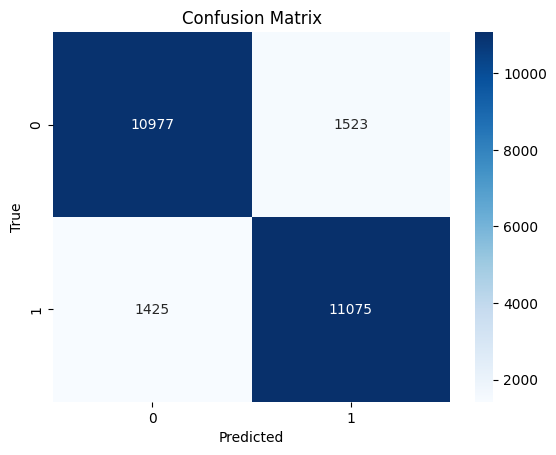

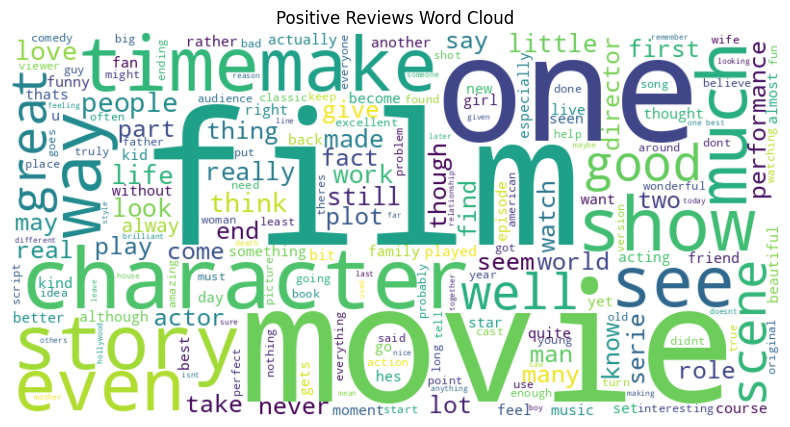

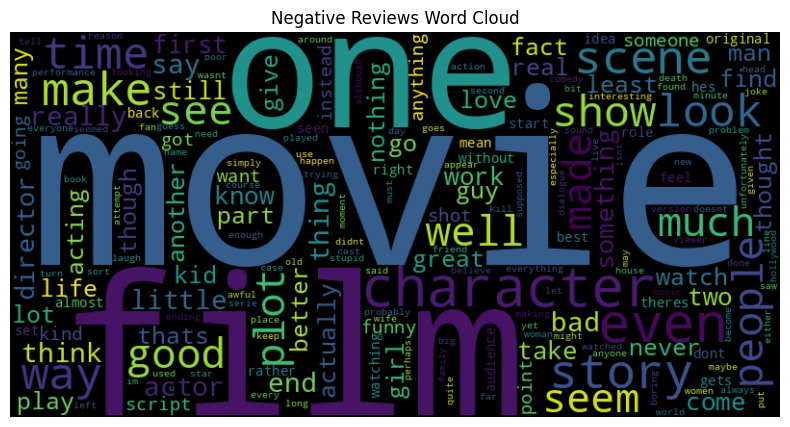

In [ ]:
# Install & import Libraries
# Install TensorFlow Datasets if not already
!pip install tensorflow_datasets

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


# Load IMDb dataset (25k train + 25k test)
ds_train, ds_test = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)

# Convert TensorFlow dataset to Pandas
def tfds_to_df(ds):
    texts, labels = [], []
    for text, label in tfds.as_numpy(ds):
        texts.append(text.decode('utf-8'))
        labels.append(int(label))
    return pd.DataFrame({'review': texts, 'sentiment': labels})

train_df = tfds_to_df(ds_train)
test_df = tfds_to_df(ds_test)

train_df.head()

# Preprocess the Text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<br\s*/?>", " ", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

# Clean both training and test data
train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)

# Vectorize Text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['clean_review'])
X_test = tfidf.transform(test_df['clean_review'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Predict Custom Review
def predict_review_sentiment(review):
    cleaned = clean_text(review)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)
    return "Positive 😊" if prediction[0] == 1 else "Negative 😠"

# Test it
predict_review_sentiment("This movie was amazing with brilliant acting!")

#  Word Cloud Visualization
from wordcloud import WordCloud

positive_text = ' '.join(train_df[train_df['sentiment'] == 1]['clean_review'])
negative_text = ' '.join(train_df[train_df['sentiment'] == 0]['clean_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


